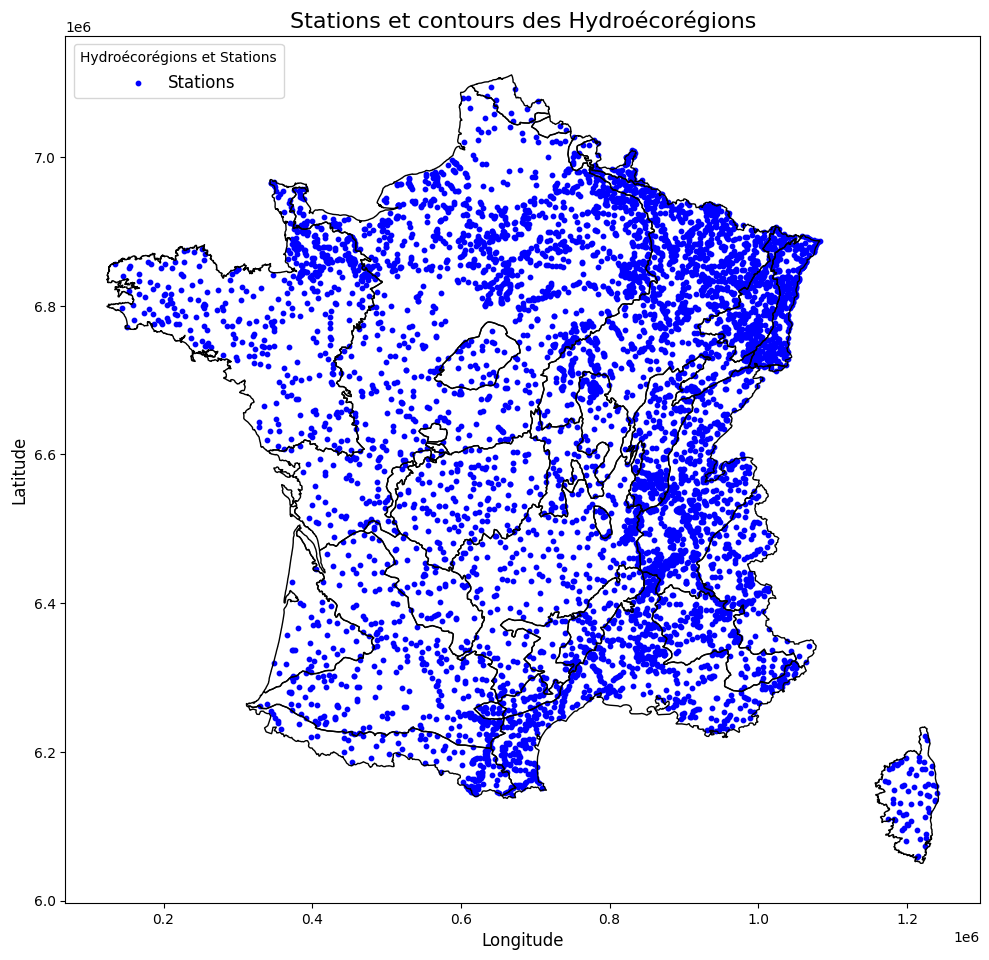

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import geometry as geom

# Projection Lambert 93
crs_lambert = 'PROJCS["RGF_1993_Lambert_93",GEOGCS["GCS_RGF_1993",DATUM["D_RGF_1993",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic"],PARAMETER["False_Easting",700000.0],PARAMETER["False_Northing",6600000.0],PARAMETER["Central_Meridian",3.0],PARAMETER["Standard_Parallel_1",49.0],PARAMETER["Standard_Parallel_2",44.0],PARAMETER["Latitude_Of_Origin",46.5],UNIT["Meter",1.0]]'

x_col = 'CoordXStationMesureEauxSurface'
y_col = 'CoordYStationMesureEauxSurface'

# Créer un GeoDataFrame pour les stations avec des points en Lambert 93
carto_i2m2 = gpd.GeoDataFrame(
    df_stations,
    crs=crs_lambert,
    geometry=gpd.GeoSeries(df_stations.apply(lambda x: geom.Point(x[x_col], x[y_col]), axis=1))
)

# Charger les hydroécorégions et les convertir en Lambert 93
HER_lambert = df_hydroregions.to_crs(crs_lambert)

# Réaliser une jointure spatiale entre stations et hydroécorégions
HER_stations = carto_i2m2.sjoin(HER_lambert, predicate='within')

# Préparer la figure
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Tracer uniquement les contours des hydroécorégions
HER_lambert.boundary.plot(ax=ax, color='black', linewidth=1)

# Tracer tous les points de `df_stations` dans une seule couleur
carto_i2m2.plot(ax=ax, color='blue', markersize=10, label='Stations')

# Ajouter une légende
ax.legend(loc='upper left', fontsize='large', title='Hydroécorégions et Stations')

# Ajouter un titre et des labels
plt.title('Stations et contours des Hydroécorégions', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\charl\AppData\Local\Temp\ipykernel_34292\4015213727.py:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



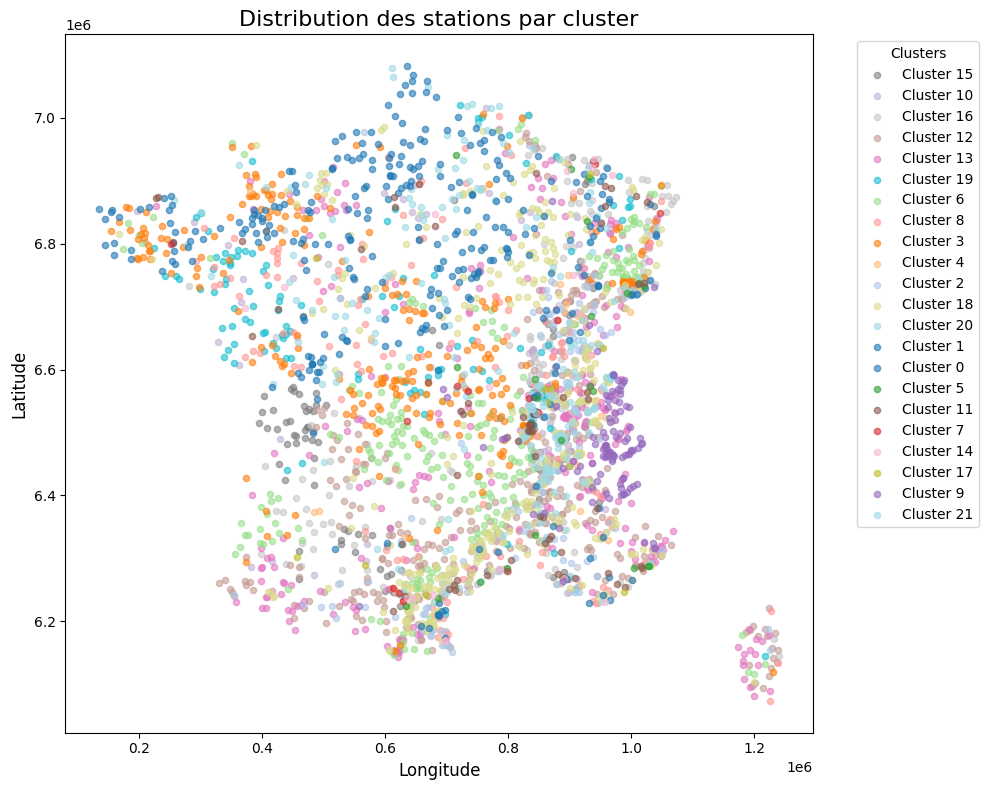

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

unique_clusters = df_results_coord['cluster'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_clusters))  # Utilise un colormap pour gérer les couleurs

plt.figure(figsize=(10, 8))

# Trace chaque station, colorée par son cluster
for cluster in unique_clusters:
    # Sélectionne les stations appartenant à ce cluster
    cluster_data = df_results_coord[df_results_coord['cluster'] == cluster]
    plt.scatter(
        cluster_data['CoordXStationMesureEauxSurface'], 
        cluster_data['CoordYStationMesureEauxSurface'], 
        c=[colors(cluster)],  # Attribue une couleur à chaque cluster
        label=f"Cluster {cluster}",  # Légende pour chaque cluster
        s=20,  # Taille des marqueurs
        alpha=0.6  # Transparence
    )

# Ajouter des titres et des légendes
plt.title('Distribution des stations par cluster', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher la carte
plt.tight_layout()  # Pour éviter que la légende dépasse
plt.show()



C:\Users\charl\AppData\Local\Temp\ipykernel_34292\3149742656.py:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



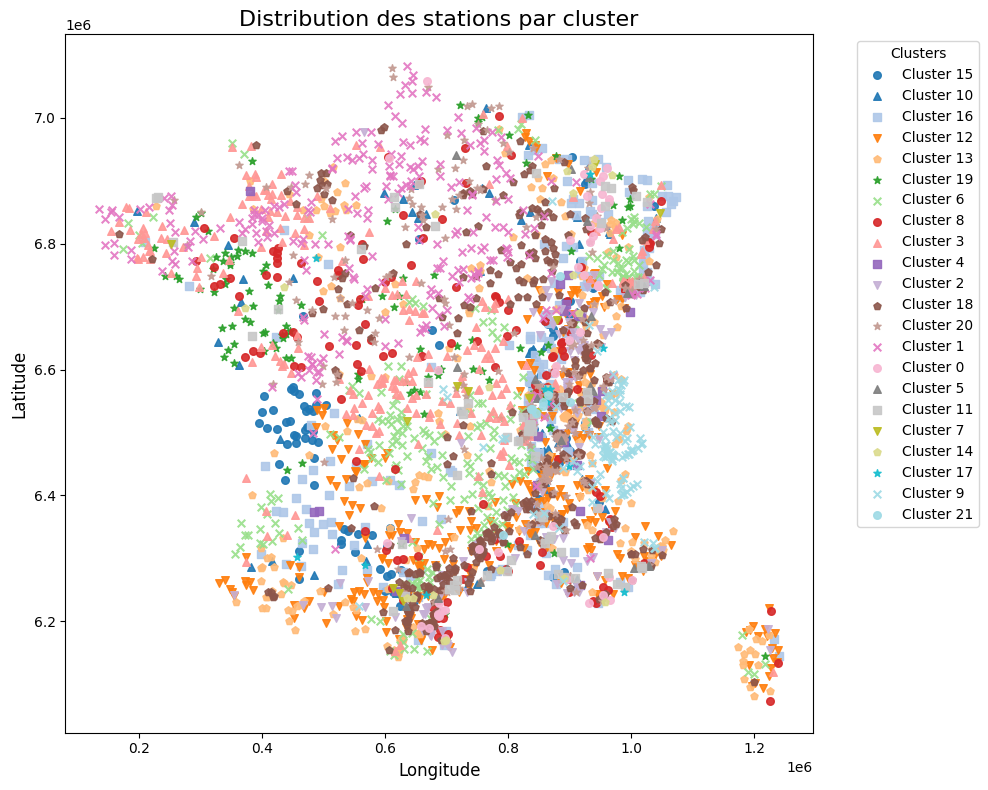

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Récupère les clusters uniques
unique_clusters = df_results_coord['cluster'].unique()

colors = plt.cm.get_cmap('tab20', len(unique_clusters))  # 'tab20' pour plus de 10 couleurs
markers = ['o', '^', 's', 'v', 'p', '*', 'x']  # Liste des différentes formes de marqueurs
plt.figure(figsize=(10, 8))

for idx, cluster in enumerate(unique_clusters):
    cluster_data = df_results_coord[df_results_coord['cluster'] == cluster]
    
    color = colors(idx)
    marker = markers[idx % len(markers)]  # Assure-toi d'avoir assez de formes, sinon les répète

    plt.scatter(
        cluster_data['CoordXStationMesureEauxSurface'], 
        cluster_data['CoordYStationMesureEauxSurface'], 
        c=[color],  # Attribue une couleur à chaque cluster
        marker=marker,  # Attribue une forme différente à chaque cluster
        label=f"Cluster {cluster}",  # Légende pour chaque cluster
        s=30,  # Taille des marqueurs
        alpha=0.9  # Transparence
    )

plt.title('Distribution des stations par cluster', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()
